<a href="https://colab.research.google.com/github/JohnSharon/Projects/blob/main/NMP_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

New code

In [7]:
import numpy as np
import random

def deposition_evaporation(L, k, p, num_steps):
    """
    L: int, size of the lattice
    k: int, length of the rods
    p: float, probability of deposition
    num_steps: int, number of time steps to simulate
    """
    # Initialize the lattice with all sites empty
    lattice = np.zeros((L,L), dtype=int)

    # Initialize variables to keep track of number of horizontal and vertical rods
    nh = 0
    nv = 0

    # Function to check if a given position is valid for deposition
    def valid_position(pos, direction):
        """
        pos: tuple, position of the starting site of the rod
        direction: tuple, direction of the rod (1,0) for horizontal, (0,1) for vertical
        """
        # Check if the next k-1 sites in the chosen direction are all empty
        for i in range(k):
            #
            if lattice[(pos[0]+direction[0]*(i))%L][(pos[1]+direction[1]*(i))%L] != 0:
                return False
        return True

    numbs = [i for i in range(int(pow(L,2)/k)+k,0,-1)]

    def find_rod(pos):
      tip = lattice[pos[0],pos[1]]
      d = (1,0)
      if (lattice[(pos[0]-1)%L,pos[1]]==tip or lattice[(pos[0]+1)%L,pos[1]]==tip):
        k = 1
        while lattice[(pos[0]-k)%L,pos[1]]==tip:
          k += 1
        p = [(pos[0]-k+1)%L,pos[1]]
      else:
        d = (0,1)
        k = 1
        while lattice[pos[0],(pos[1]-k)%L]==tip:
          k += 1
        p = [pos[0],(pos[1]-k+1)%L]
      return p,d


    results = []
    # Run the simulation for a given number of time steps
    for step in range(num_steps):
        # Attempt to deposit or evaporate a rod
        pos = (random.randint(0,L-1), random.randint(0,L-1))
        if random.random() < p:
            # Deposition attempt

            if random.random() < 0.5:
                # Horizontal deposition attempt
                direction = (1,0)

            else:
                # Vertical deposition attempt
                direction = (0,1)
            
            if valid_position(pos, direction):
                tip = numbs.pop()
                # Deposition successful, update lattice and variables
                for i in range(k):
                    lattice[(pos[0]+direction[0]*i)%L][(pos[1]+direction[1]*i)%L] = tip
                if direction == (1,0):
                    nh += 1
                else:
                    nv += 1

        else:               
          tip = lattice[pos[0],pos[1]]
          if tip not in numbs:
           if tip != 0:
            numbs.append(tip)
            head,d = find_rod(pos)
            for i in range(k):
                lattice[(head[0]+d[0]*i)%L][(head[1]+d[1]*i)%L] = 0
            if d == (1,0):
                    nh -= 1
            else:
                    nv -= 1


        # Compute density and order parameter
        rho = (k*(nh+nv))/(L*L)
        difference = (nv-nh)
        sum = (nv+nh)
        Q = abs(difference)/(sum+1e-2)



        # Append results to list
        
        results.append([step, difference, rho, Q, sum])

    return np.array(results)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# TESTS 1

0.3748709195402299
0.1902313925130989


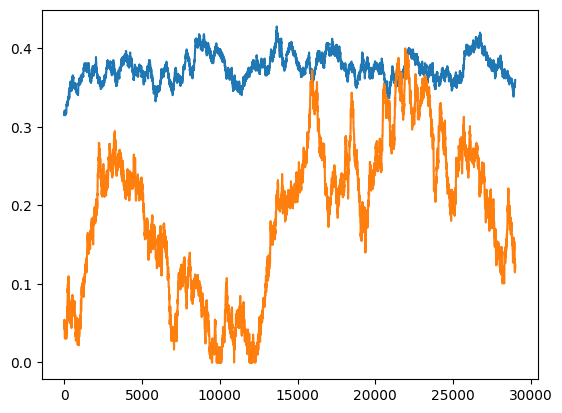

In [ ]:
L = 60
k = 7
p = 0.7
num_steps = 30000
results = deposition_evaporation(L, k, p, num_steps)
plt.plot(results[1000:,2],label="P = 0.2")
plt.plot(results[1000:,3],label="P = 0.2")
print(results[1000:,2].mean())
print(results[1000:,3].mean())

<Axes: ylabel='Density'>

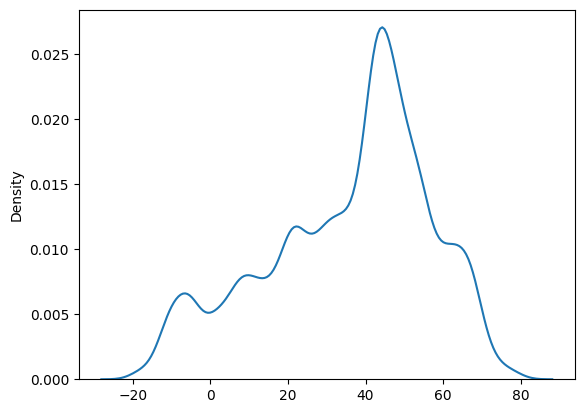

In [ ]:
n=int(1000)
quantity = 1
sns.kdeplot(results[n:,quantity], label="P = 0.2")

In [ ]:
x = np.linspace(0.1,1,500)
rho = []
Q = []
for  i in x:
  res = deposition_evaporation(60, 8, i, 100000)
  p = res[1000:,2].mean()
  q = res[1000:,3].mean()
  rho.append(p); Q.append(q)
  
#Q = [deposition_evaporation(60, 8, i, 30000)[1000:,3].mean() for  i in x]

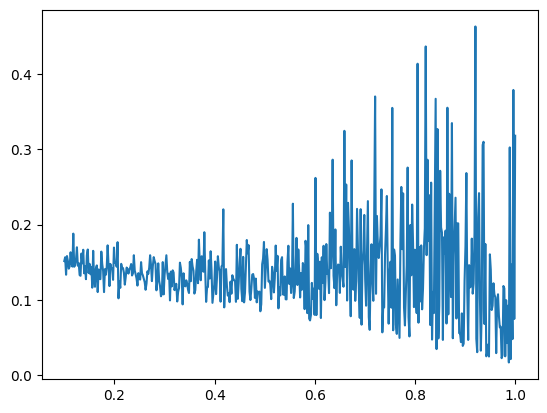

In [ ]:
plt.plot(x,Q)

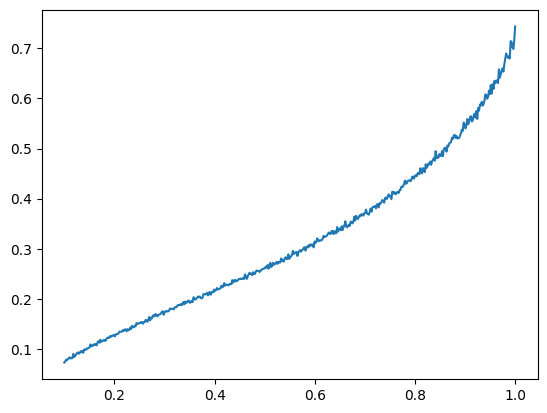

In [ ]:
plt.plot(x,rho)
plt.show()

In [ ]:
len(x), len(rho)

(500, 500)

In [ ]:
coefficients = np.polyfit(x, rho, 3)
coefficients

array([ 1.08632137, -1.31061813,  0.92743856, -0.01247219])

In [ ]:

def poly(x):
  return coefficients[0]*x**3 + coefficients[1]*x**2+coefficients[2]*x+coefficients[3] 

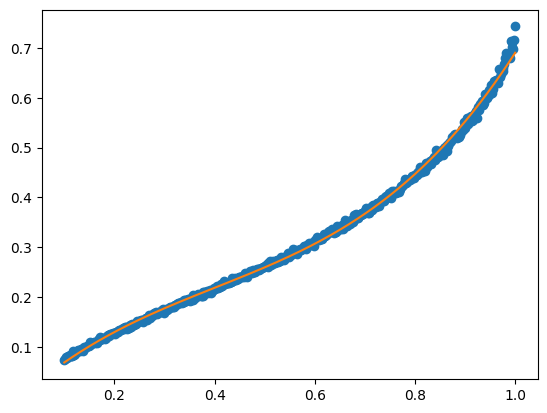

In [ ]:
plt.figure()

plt.plot(x, rho, 'o')
plt.plot(x, poly(x))
plt.show()


In [ ]:
len(res[1000:,2][::100]), len(res[1000:,2])

(290, 29000)

In [ ]:
1e-2

0.01

# TESTS 2


In [ ]:
x = np.linspace(0.1,1,50)
rho = []
Q = []
dif = []
for  i in x:
  res = deposition_evaporation(90, 10, i, 500000)
  p = res[1000:,2][::200].mean()
  q = res[1000:,3][::200].mean()
  norm1 = res[1000:,1][::200].mean()
  norm2 = res[1000:,4][::200].mean()
  dif.append(abs(norm1)/(norm2+1e-3))
  rho.append(p); Q.append(q)


Text(0, 0.5, 'quantity Q_1')

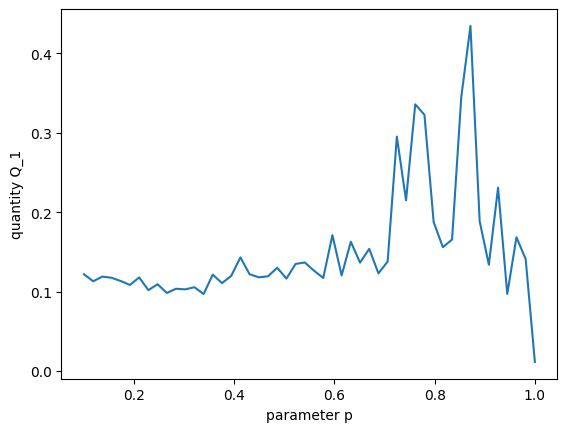

In [ ]:
plt.plot(x,Q)
plt.xlabel('parameter p')
plt.ylabel('quantity Q_1')

Text(0, 0.5, 'quantity Q (nematic order parameter)')

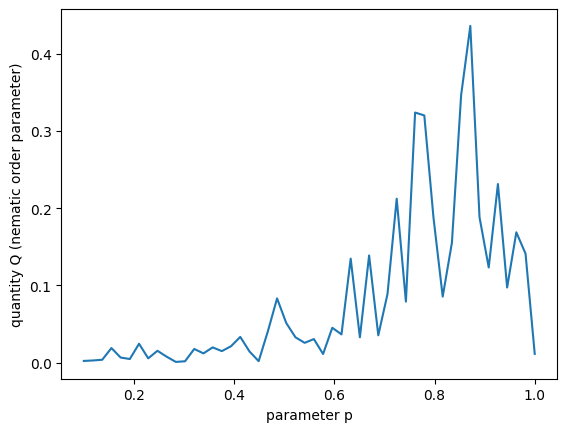

In [ ]:
plt.plot(x,dif)
plt.xlabel('parameter p')
plt.ylabel('quantity Q (nematic order parameter)')

WE NEED TO PLOT THE QUANTITIES WRT DENSITY

Text(0, 0.5, 'quantity ρ (density)')

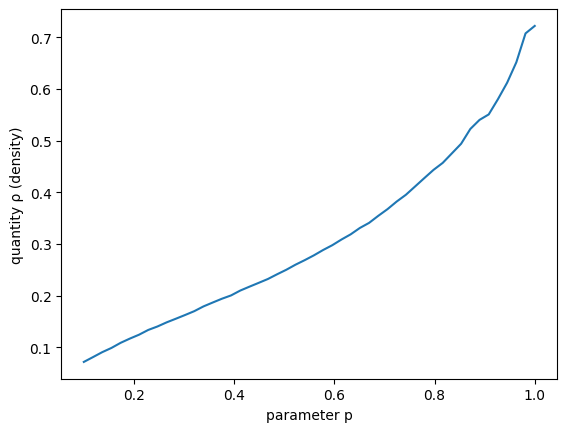

In [ ]:
plt.plot(x,rho)
plt.xlabel('parameter p')
plt.ylabel('quantity \u03C1 (density)')

In [ ]:
n=5
coefficients = np.polyfit(x, rho, n)
def poly(x):
  sum=0
  for i in range(0,n+1):
    sum += coefficients[i]*x**(n-i)
  return sum
d=poly(x)

In [ ]:
d1=poly
d1(1)

0.7271966949172789

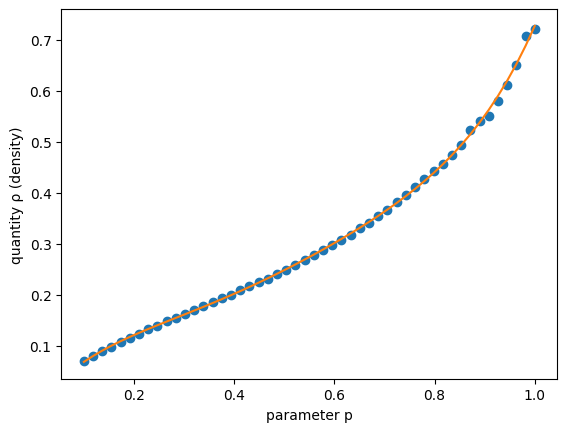

In [ ]:
plt.figure()

plt.plot(x, rho, 'o')
plt.plot(x, d)
plt.xlabel('parameter p')
plt.ylabel('quantity \u03C1 (density)')
plt.show()

Text(0, 0.5, 'quantity Q_1')

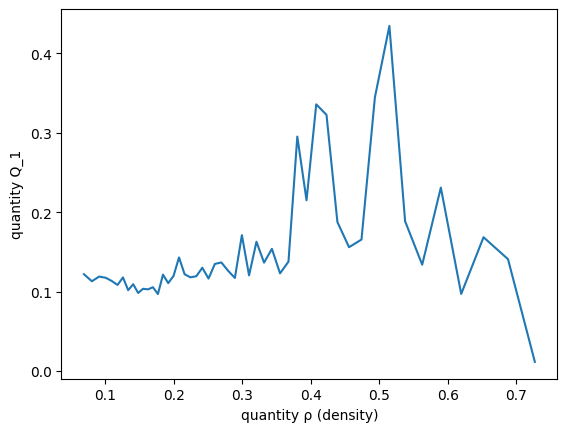

In [ ]:
plt.plot(d,Q)
plt.xlabel('quantity \u03C1 (density)')
plt.ylabel('quantity Q_1')

Text(0, 0.5, 'quantity Q (nematic order parameter)')

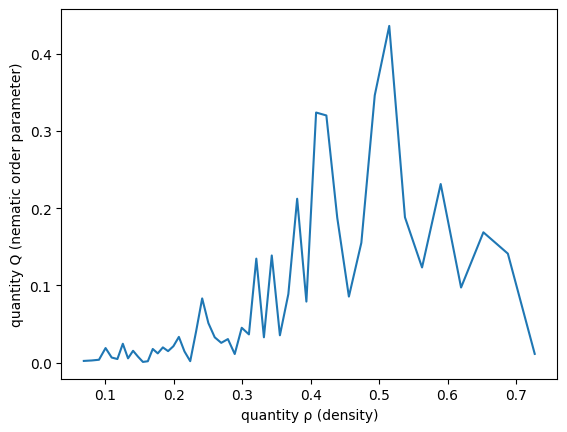

In [ ]:
plt.plot(d,dif)
plt.xlabel('quantity \u03C1 (density)')
plt.ylabel('quantity Q (nematic order parameter)')

TESTS 3 (FOR 0.5 TO 0.9)

In [2]:
coeffs = [3.85318056, -9.29377225,  9.00566461, -4.05469347,  1.23955135, -0.02273411]

In [3]:
def density(x):
  sum=0
  for i in range(0,6):
    sum += coeffs[i]*x**(n-i)
  return sum

In [5]:
import numpy as np

In [9]:
y = np.linspace(0.5,0.99,15)
rho1 = []
Q1 = []
dif1 = []
for  i in y:
  res = deposition_evaporation(90, 10, i, 600000)
  p = res[1000:,2][::300].mean()
  q = res[1000:,3][::300].mean()
  norm1 = res[1000:,1][::300].mean()
  norm2 = res[1000:,4][::300].mean()
  dif1.append(abs(norm1)/(norm2+1e-3))
  rho1.append(p); Q1.append(q)

In [ ]:
plt.figure()
plt.plot(y, rho1, 'o')#, legends='actual density')
plt.plot(y, density(y))#,legends='density from formula')
plt.xlabel('parameter p')
plt.ylabel('\u03C1')
plt.show()

In [ ]:
n=5
coefficient = np.polyfit(y, rho1, n)
def poly1(x):
  sum=0
  for i in range(0,n+1):
    sum += coefficient[i]*x**(n-i)
  return sum
d1=poly1(y)

In [ ]:
plt.plot(poly1(y),Q1)
plt.xlabel('parameter p')
plt.ylabel('quantity Q_1')

In [ ]:
plt.plot(poly1(y),dif1)
plt.xlabel('quantity \u03C1 (density)')
plt.ylabel('quantity Q (nematic order parameter)')

In [ ]:
plt.plot(x,Q)

In [ ]:
plt.plot(x,rho)

# TESTS 4 (NO TIME)

In [ ]:
x = np.linspace(0.8,0.9,250)
rho = []
Q = []
for  i in x:
  res = deposition_evaporation(60, 8, i, 30000)
  p = res[1000:,2].mean()
  q = res[1000:,3].mean()
  rho.append(p); Q.append(q)
  
#Q = [deposition_evaporation(60, 8, i, 30000)[1000:,3].mean() for  i in x]

In [ ]:
plt.plot(x,Q)

#Auto correlation function

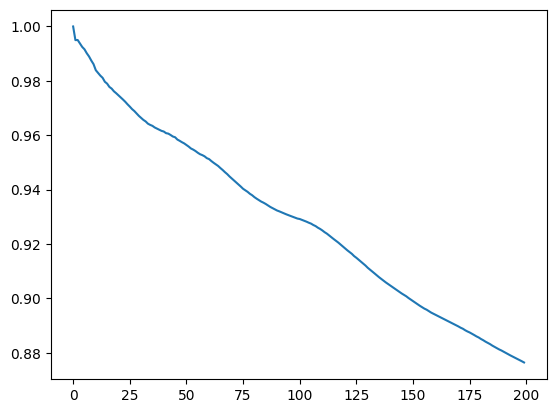

In [ ]:
res = deposition_evaporation(90, 10, 0.6, 30000)
def mean(arr,l):
  sum=0
  for i in range(0,len(arr)-l):
      sum += arr[i]*arr[i+l]
  return sum/(len(arr)-l)

def autocorrelation(res,q):
  C=[] 
  for i in range(0,3000):
    meansq= pow((res[:,q].mean()),2)
    c = (mean(res[:,q],i)-meansq)/(mean(res[:,q],0)-meansq)
    C.append(c)
  return C
    
plt.plot(autocorrelation(res,3))

In [ ]:
#@title Junk Code
##JUNK CODES

b=[43,8]
print(lattice[b[0],b[1]])
print(find_rod(b))

0
([43, 8], (1, 0))


## Example run


In [ ]:

import numpy as np
import random

# Set up lattice size and variables
L = 20 # Lattice size
k = 4 # Length of rods
p = 0.5 # Probability of deposition
rho = 0.2 # Density of rods

# Initialize the lattice with all sites empty
lattice = np.zeros((L,L), dtype=int)

# Initialize variables to keep track of number of horizontal and vertical rods
nh = 0
nv = 0

density = []
order = []
# Function to check if a given position is valid for deposition
def valid_position(pos, direction):
    """
    pos: tuple, position of the starting site of the rod
    direction: tuple, direction of the rod (1,0) for horizontal, (0,1) for vertical
    """
    # Check if the next k-1 sites in the chosen direction are all empty
    for i in range(k-1):
        if lattice[(pos[0]+direction[0]*(i+1))%L][(pos[1]+direction[1]*(i+1))%L] != 0:
            return False
    return True

# Run the simulation for a given number of time steps
num_steps = 1000
for step in range(num_steps):
    # Attempt to deposit or evaporate a rod
    if random.random() < p:
        # Deposition attempt
        if random.random() < 0.5:
            # Horizontal deposition attempt
            pos = (random.randint(0,L-1), random.randint(0,L-1))
            direction = (1,0)
        else:
            # Vertical deposition attempt
            pos = (random.randint(0,L-1), random.randint(0,L-1))
            direction = (0,1)
        if valid_position(pos, direction):
            # Deposition successful, update lattice and variables
            for i in range(k):
                lattice[(pos[0]+direction[0]*i)%L][(pos[1]+direction[1]*i)%L] = 1
            if direction == (1,0):
                nh += 1
            else:
                nv += 1
    else:
        # Evaporation attempt
        if nh+nv == 0:
            continue
        if random.random() < nh/(nh+nv):
            # Horizontal evaporation attempt
            pos = (random.randint(0,L-1), random.randint(0,L-k))
            direction = (1,0)
        else:
            # Vertical evaporation attempt
            pos = (random.randint(0,L-k), random.randint(0,L-1))
            direction = (0,1)
        if all(lattice[(pos[0]+direction[0]*i)%L][(pos[1]+direction[1]*i)%L] == 1 for i in range(k)):
            # Evaporation successful, update lattice and variables
            for i in range(k):
                lattice[(pos[0]+direction[0]*i)%L][(pos[1]+direction[1]*i)%L] = 0
            if direction == (1,0):
                nh -= 1
            else:
                nv -= 1

    # Compute density and order parameter
    rho = (nh+nv)/(L*L)
    Q = abs(nh-nv)/(nh+nv)

    # Print out results every 100 steps
    if step % 100 == 0:
        order.append(Q)
        density.append(rho)
        print(f"Step {step}: Density = {rho:.3f}, Order parameter = {Q:.3f}")


Step 100: Density = 0.068, Order parameter = 0.259
Step 200: Density = 0.100, Order parameter = 0.250
Step 300: Density = 0.125, Order parameter = 0.240
Step 400: Density = 0.130, Order parameter = 0.308
Step 500: Density = 0.142, Order parameter = 0.368
Step 600: Density = 0.147, Order parameter = 0.356
Step 700: Density = 0.158, Order parameter = 0.270
Step 800: Density = 0.155, Order parameter = 0.226
Step 900: Density = 0.150, Order parameter = 0.267


## Previous code

In [ ]:
import numpy as np
import random

def deposition_evaporation(L, k, p, num_steps):
    """
    L: int, size of the lattice
    k: int, length of the rods
    p: float, probability of deposition
    num_steps: int, number of time steps to simulate
    """
    # Initialize the lattice with all sites empty
    lattice = np.zeros((L,L), dtype=int)

    # Initialize variables to keep track of number of horizontal and vertical rods
    nh = 0
    nv = 0

    # Function to check if a given position is valid for deposition
    def valid_position(pos, direction):
        """
        pos: tuple, position of the starting site of the rod
        direction: tuple, direction of the rod (1,0) for horizontal, (0,1) for vertical
        """
        # Check if the next k-1 sites in the chosen direction are all empty
        for i in range(k-1):
            if lattice[(pos[0]+direction[0]*(i+1))%L][(pos[1]+direction[1]*(i+1))%L] != 0:
                return False
        return True
 


    results = []
    # Run the simulation for a given number of time steps
    for step in range(num_steps):
        # Attempt to deposit or evaporate a rod
        if random.random() < p:
            # Deposition attempt
            if random.random() < 0.5:
                # Horizontal deposition attempt
                pos = (random.randint(0,L-1), random.randint(0,L-1))
                direction = (1,0)
                tip = 1
            else:
                # Vertical deposition attempt
                pos = (random.randint(0,L-1), random.randint(0,L-1))
                direction = (0,1)
                tip = 2
            if valid_position(pos, direction):
                # Deposition successful, update lattice and variables
                for i in range(k):
                    lattice[(pos[0]+direction[0]*i)%L][(pos[1]+direction[1]*i)%L] = tip
                if direction == (1,0):
                    nh += 1
                else:
                    nv += 1
        
        else:
            # Evaporation attempt
           if nh+nv == 0:
                break
            if random.random() < nh/(nh+nv):
                # Horizontal evaporation attempt
                pos = (random.randint(0,L-1), random.randint(0,L-1))
                direction = (1,0)
                tip = 1
            else:
                # Vertical evaporation attempt
                pos = (random.randint(0,L-1), random.randint(0,L-1))
                direction = (0,1)
                tip  = 2
            if all(lattice[(pos[0]+direction[0]*i)%L][(pos[1]+direction[1]*i)%L] == tip for i in range(k)):
                # Evaporation successful, update lattice and variables
                for i in range(k):
                    lattice[(pos[0]+direction[0]*i)%L][(pos[1]+direction[1]*i)%L] = 0
                if direction == (1,0):
                    nh -= 1
                else:
                    nv -= 1


        # Compute density and order parameter
        rho = (k*(nh+nv))/(L*L)
        Q = abs(nh-nv)/(nh+nv+1e-2)
        norm = (nv-nh)


        # Append results to list
        
        results.append([step, norm, rho, Q])

    return np.array(results)


In [ ]:
import random
L = 60
k = 8
(random.randint(0,L-1), random.randint(0,L-k))

(8, 39)

In [ ]:
x = np.linspace(0.01,1,50)

In [ ]:
def avgn(arr, n):
    # Check that arr is a NumPy array and n is a positive integer
    if not isinstance(arr, np.ndarray):
        raise TypeError("arr must be a NumPy array")
    if not isinstance(n, int) or n <= 0:
        raise ValueError("n must be a positive integer")
    
    # Calculate the sum of the first n elements
    sum_n = np.sum(arr[:n])
    
    # Calculate the average and return it
    return sum_n / n



In [ ]:
avgn(np.array(deposition_evaporation(120, 10, 0.200, 10))[:,3],2)

0.9900990099009901

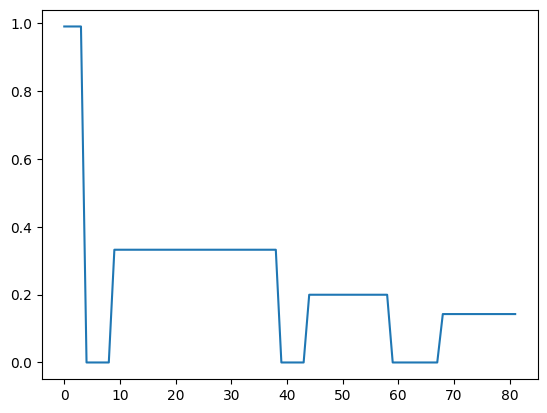

In [ ]:
plt.plot((np.array(deposition_evaporation(120, 10, 0.100, 100))[:,3]))

In [ ]:
Q_p = [np.array(deposition_evaporation(120,6,i,100))[1000:,3].mean() for i in x]

IndexError: ignored

In [ ]:
rho_p = [np.array(deposition_evaporation(120,6,i,1000))[1000:,2].mean() for i in x]

<ipython-input-132-362f9315e777>:1: RuntimeWarning: Mean of empty slice.
  rho_p = [np.array(deposition_evaporation(120,6,i,1000))[1000:,2].mean() for i in x]


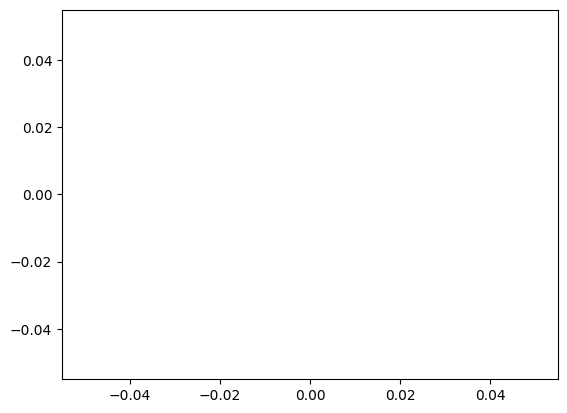

In [ ]:
plt.plot(rho_p, Q_p,"o--")

In [ ]:
p1 = np.array(deposition_evaporation(60, 15, 0.200, 100000))
p2 = np.array(deposition_evaporation(60, 15, 0.300, 100000))
p3 = np.array(deposition_evaporation(60, 15, 0.400, 100000))
p4 = np.array(deposition_evaporation(60, 15, 0.500, 100000))


KeyboardInterrupt: ignored

In [ ]:
import seaborn as sns

In [ ]:
p1[1000:,1].max(),p1[1000:,1].min()

(8.0, -20.0)

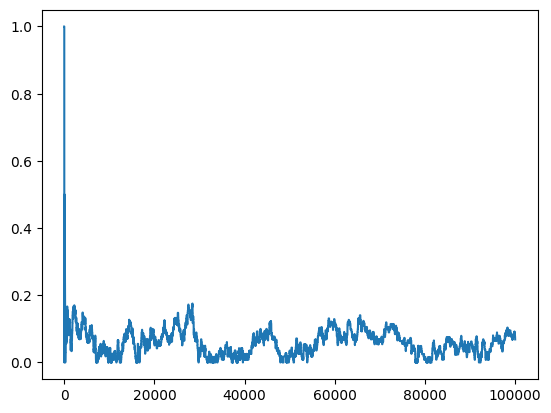

In [ ]:
plt.plot(p1[:,3])

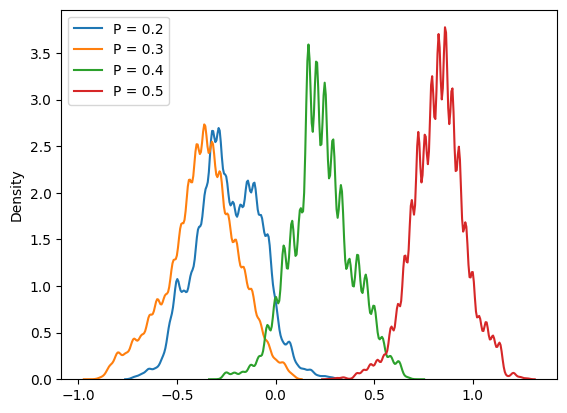

In [ ]:
sns.kdeplot(p1[1000:,1]/(p1[1000:,1].max()-p1[1000:,1].min()), label="P = 0.2")
sns.kdeplot(p2[1000:,1]/(p2[1000:,1].max()-p2[1000:,1].min()), label="P = 0.3")
sns.kdeplot(p3[1000:,1]/(p3[1000:,1].max()-p3[1000:,1].min()), label="P = 0.4")
sns.kdeplot(p4[1000:,1]/(p4[1000:,1].max()-p4[1000:,1].min()), label="P = 0.5")
plt.legend()

In [ ]:
def mir(arr):
    if np.mean(arr) < 0:
        return -arr
    else:
        return arr


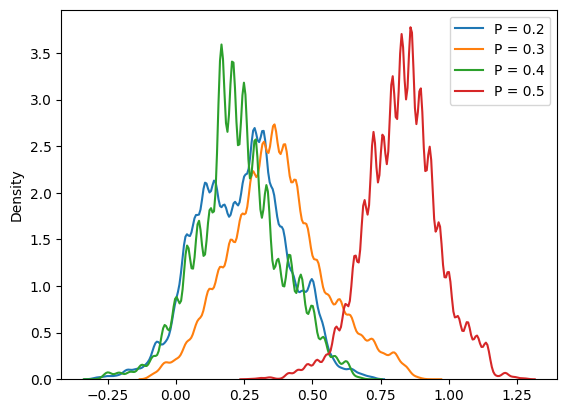

In [ ]:
sns.kdeplot(mir(p1[1000:,1]/(p1[1000:,1].max()-p1[1000:,1].min())), label="P = 0.2")
sns.kdeplot(mir(p2[1000:,1]/(p2[1000:,1].max()-p2[1000:,1].min())), label="P = 0.3")
sns.kdeplot(mir(p3[1000:,1]/(p3[1000:,1].max()-p3[1000:,1].min())), label="P = 0.4")
sns.kdeplot(mir(p4[1000:,1]/(p4[1000:,1].max()-p4[1000:,1].min())), label="P = 0.5")
plt.legend()

In [ ]:
x = np.linspace(0.1,1,500)

In [ ]:
a=[[1,2],[1,2]]
w=

In [ ]:
np.array([[1,2],[1,3]])[:,1].mean()

2.5

In [ ]:
x = np.linspace(0.01,1,50)
Q = deposition_evaporation(60, 8, i, 20000)[:,].mean() for i in x] 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Q[0]

1073.0538718693656

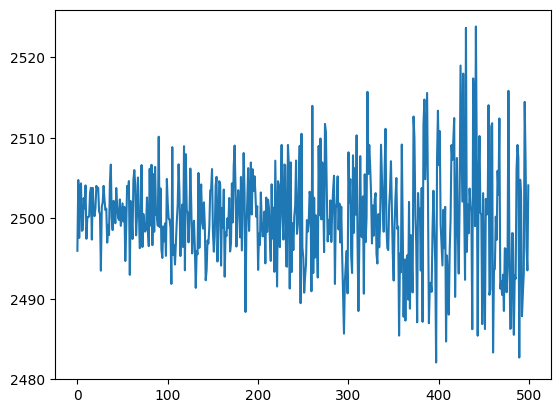

In [ ]:
plt.plot(Q)

In [ ]:
import matplotlib.pyplot as plt

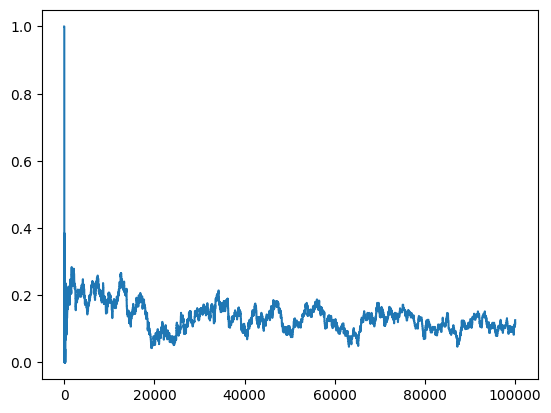

In [ ]:
plt.plot(p1[:,3])

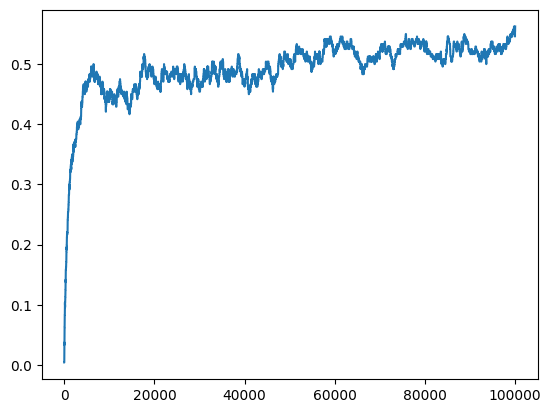

In [ ]:
plt.plot(p1[:,2])